In [53]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

$$\ddot{x}+2\eta|\dot{x}|^{n-1}\dot{x}+\omega_{0}^{2}x = 0$$
$$y = \dot{x}$$
$$\begin{cases}
 \dot{y} = -2\eta|y|^{n-1}y-\omega_{0}^{2}x \\
 \dot{x} = y
\end{cases}$$

In [54]:
@nb.njit
def right_part(arg, eta, n, omega):
    
    rp = np.array([-2*eta*(np.abs(arg[0])**(n-1))*arg[0] - omega**2*arg[1],
                    arg[0]], dtype=np.float64)
    
    return rp

In [55]:
@nb.njit
def solver(N, dt, eta, n, omega, y0, x0):
    
    left_part = np.zeros((2,N), dtype=np.float64)
    left_part[0,0] = y0
    left_part[1,0] = x0
    
    for i in range(N-1):
        
        k1 = np.zeros((2), dtype=np.float64)
        k2 = np.zeros((2), dtype=np.float64)
        k3 = np.zeros((2), dtype=np.float64)
        k4 = np.zeros((2), dtype=np.float64)
        
        k1 = right_part(left_part[:,i], eta, n, omega)
        k2 = right_part(left_part[:,i]+k1*dt/2, eta, n, omega)
        k3 = right_part(left_part[:,i]+k2*dt/2, eta, n, omega)
        k4 = right_part(left_part[:,i]+k3*dt, eta, n, omega)
        
        left_part[:,i+1] = left_part[:,i] + dt*(k1[:] + 2*k2[:] + 2*k3[:] + k4[:])/6
    
    return left_part

Вязкое трение
$$\eta < \omega$$

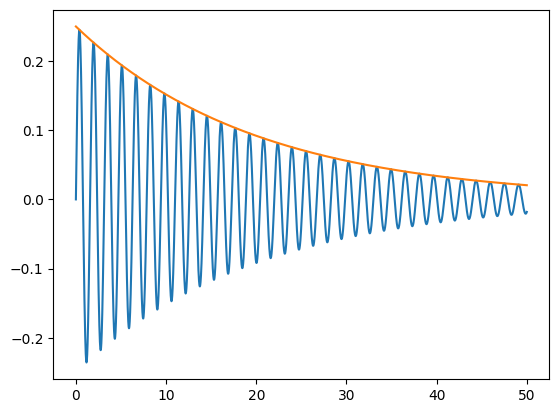

In [56]:
eta = 0.05
omega = 4
x0 = 0
y0 = 1
dt =0.001
N = 50000
n = 1

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, eta, n, omega, y0, x0)

A_0 = np.sqrt(x0**2+(y0**2+2*y0*x0*eta)/omega**2)

ogibau = A_0*np.exp(-eta*t)

plt.plot(t, solv[1,:])
plt.plot(t, ogibau)
plt.show()

Вязкое трение
$$\eta > \omega$$

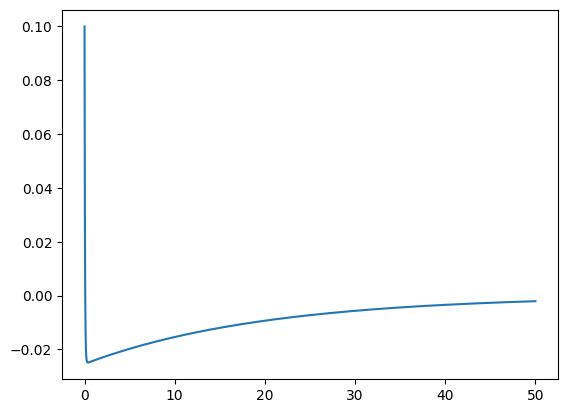

In [57]:
eta = 10
omega = 1
x0 = 1/2
y0 = 0.1
dt =0.001
N = 50000
n = 1

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, eta, n, omega, y0, x0)

plt.plot(t, solv[0,:])

plt.show()

Турбулентное трение

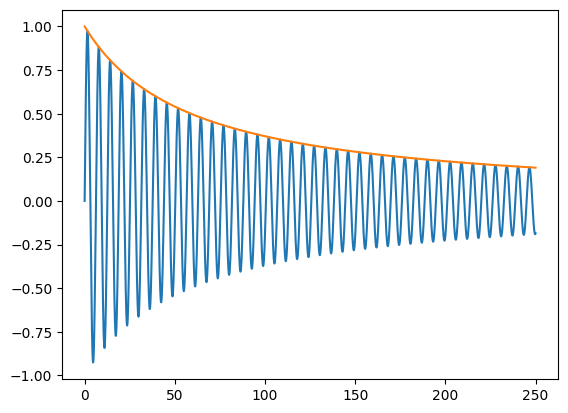

In [58]:
eta = 0.02
omega = 1
x0 = 0
y0 = 1
dt =0.005
N = 50000
n = 2

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, eta, n, omega, y0, x0)
A0 = 1
A = A0/(1+(8*omega*eta*A0/(3*np.pi))*t)


plt.plot(t, solv[1,:])
plt.plot(t, A)
plt.show()

Кулоново трение

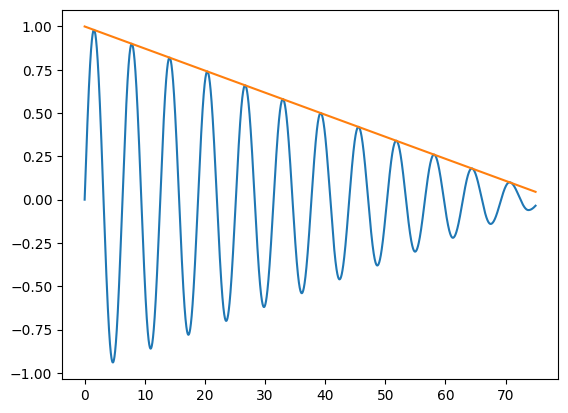

In [59]:
def heaviside(x, x0_value=0.5):
    return np.where(x < 0, 0, np.where(x > 0, 1, x0_value))

eta = 0.01
omega = 1
x0 = 0
y0 = 1
dt =0.005
N = 15000
n = 0

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, eta, n, omega, y0, x0)
A0 = 1
A = (A0-4*eta*t/(omega*np.pi))*heaviside(A0*omega*np.pi/(4*eta)-t)

plt.plot(t, solv[1,:])
plt.plot(t, A)
plt.show()

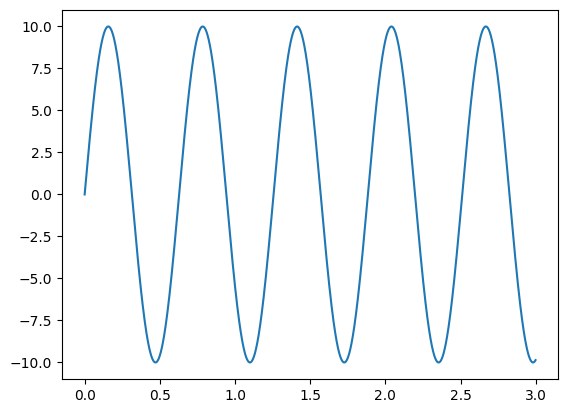

In [63]:

eta = -1
omega = -10
x0 = 0
y0 = 100
dt =0.001
N = 3000
n = -2

t = np.arange(0, dt * N, dt)

solv = solver(N, dt, eta, n, omega, y0, x0)

plt.plot(t, solv[1,:])

plt.show()